<a href="https://colab.research.google.com/github/mfaria-p/Machine_learning_intro_ANN/blob/main/ANN_Multioutput_Qwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-57cc3ff34e24>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


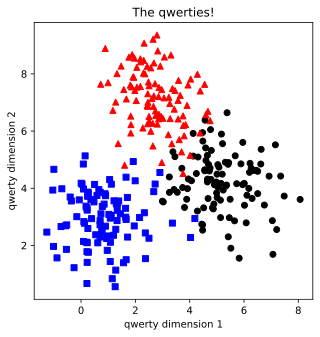

In [ ]:
#create the Data

nPerClust = 100
blur = 1 #standart deviation, how spread out are the data from their data cluster mean

#This are the center of our cloud of data
A = [1,3]
B = [5,4]
C = [3,7]

#generate data - random noise based on the center of the cloud
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1)), 1+np.ones((nPerClust,1)))) #category labels so the data is converted into 0s and 1s

#concatanate into a matrix
#e uma coluna dos x, e outra coluna dos y; dai dois outputs(daus infos)
data_np = np.hstack((a,b,c)).T #convert the separate data into a matrix

#convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], 'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
#create ann

 #in this case, the output layer has 3 neurons, each corresponding to one of the three categories, enabling the neural network to output the probabilities
 #of the input data belonging to each class. The softmax activation function is often used in the output layer for multi-class classification tasks to convert the raw output scores into probabilities.
ANNq = nn.Sequential(
    nn.Linear(2,4), #input layer
    nn.ReLU(), #activation function
    nn.Linear(4,4), #hidden layer
    nn.ReLU(), #activation funtion
    nn.Linear(4,4),#hidden layer
    nn.ReLU(),#activation funtion
    nn.Linear(4,3), #output
    nn.Softmax(dim=1),
)

#define loss function
lossfun = nn.CrossEntropyLoss()
#this function is automatically computing softmax. So, it does not need to be explicit in the architecture

#optimizer
optimizer = torch.optim.SGD(ANNq.parameters(), lr=0.01)

In [ ]:
numepochs = 10000

#initiate losses
losses = torch.zeros(numepochs)
ongoingAcc = []

#loop over epochs

for epochi in range(numepochs):

  #forward pass
  yHat = ANNq(data)

  #compute loss
  loss = lossfun(yHat, labels)
  # losses[epochi] = loss é so para guardar os valores
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #compute accuracy at each training step
  #The torch.argmax(yHat, axis=1) function call is used to find the index of the maximum value along the specified axis (axis 1 in this case) of the tensor yHat.
  matches = torch.argmax(yHat, axis =1) == labels #booleans(False/True)
  #This line converts the boolean tensor matches to a tensor of numeric values (0 or 1) by casting it to float. True is converted to 1.0 and False is converted to 0.0.
  matchesNumeric = matches.float() #convert to numbers (0/1)
  #This line calculates the accuracy percentage by taking the mean of the matchesNumeric tensor (which represents the accuracy of each prediction),
  #and then multiplying by 100 to convert it to a percentage
  accuracyPct = 100*torch.mean(matchesNumeric) #average and x 100
  ongoingAcc.append(accuracyPct) #add to list of accuracy

  #final forward pass
  predictions = ANNq(data)

  predlabels = torch.argmax(predictions, axis=1)
  totalacc = 100*torch.mean((predlabels == labels).float())
#print(torch.argmax(yHat, axis =1))
#print(yHat)

In [ ]:
torch.argmax(predictions, axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
totalacc

tensor(95.3333)

Final accuracy 95.3333%


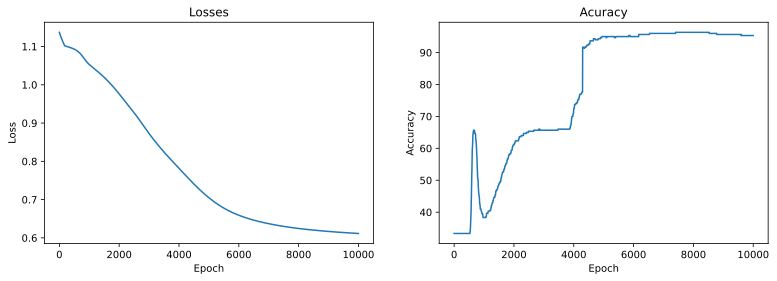

In [ ]:
#report accuracy
print('Final accuracy %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Acuracy')

plt.show()

In [ ]:
#confirm that all model predictions sum to 1, but only when converted to softmax

sm = nn.Softmax(1)
torch.sum(sm(yHat), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

In [ ]:
yHat

tensor([[9.9997e-01, 2.7674e-07, 3.4162e-05],
        [9.9688e-01, 4.0100e-05, 3.0762e-03],
        [9.9978e-01, 1.2066e-06, 2.1751e-04],
        [8.7167e-01, 1.2567e-01, 2.6686e-03],
        [9.9987e-01, 1.1551e-04, 1.2273e-05],
        [9.9921e-01, 1.5985e-06, 7.8396e-04],
        [9.9997e-01, 9.5255e-07, 2.5082e-05],
        [9.9981e-01, 1.4265e-06, 1.8582e-04],
        [9.9984e-01, 1.0991e-07, 1.6185e-04],
        [9.9422e-01, 5.6785e-03, 1.0282e-04],
        [9.2378e-01, 1.7275e-03, 7.4493e-02],
        [1.0000e+00, 8.7606e-07, 2.6216e-06],
        [9.9959e-01, 8.3484e-05, 3.2194e-04],
        [9.9502e-01, 5.6588e-06, 4.9769e-03],
        [9.9999e-01, 4.7791e-08, 5.5735e-06],
        [9.9996e-01, 3.4816e-05, 1.6942e-06],
        [2.3194e-01, 7.4950e-01, 1.8558e-02],
        [1.0000e+00, 1.5767e-06, 9.4590e-07],
        [1.0000e+00, 2.0074e-06, 9.7006e-07],
        [1.0000e+00, 1.4245e-06, 2.8928e-06],
        [1.0000e+00, 2.1365e-07, 6.0000e-08],
        [9.9862e-01, 6.8814e-04, 6

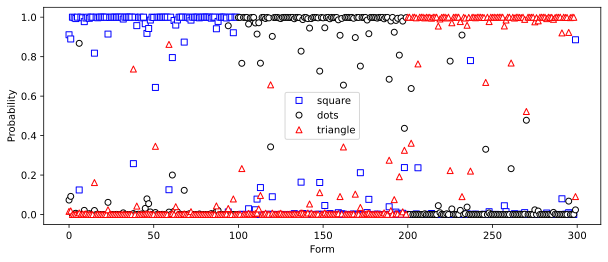

In [ ]:
#plot the raw model ouputs

fig = plt.figure(figsize=(10,4))

colorshape = ['bs','ko','r^']
for i in range(3):
  plt.plot(yHat[:,i].detach(),colorshape[i], markerfacecolor='w')

plt.xlabel('Form')
plt.ylabel('Probability')
plt.legend(['square', 'dots', 'triangle'])

plt.show()